In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

In [4]:
news_df=pd.read_csv(r'C:\Users\LIKITHA\Desktop\4-2 project\fake_or_real_news.csv')

In [5]:
news_df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
news_df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [7]:
#getting the shape of our data 
news_df.shape

(6335, 4)

In [8]:
news=news_df.label
news.value_counts()
news

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [9]:
'''The punctuations are also not significant for text classification and it only increases the total dimension in vector space, so we filter them out before building the machine learning model.'''
def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [10]:
news_df['removed_punc'] = news_df['text'].apply(lambda x: remove_punct(x))
news_df.head()

,Unnamed: 0,title,text,label,removed_punc
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...


In [11]:
'''Convert text to lower case tokens. Here, split() is applied on white-spaces. But, it could be applied
    on special characters, tabs or any other string based on which text is to be seperated into tokens.
    '''
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [12]:
news_df['tokens'] = news_df['removed_punc'].apply(lambda msg : tokenize(msg))
news_df.head()

,Unnamed: 0,title,text,label,removed_punc,tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr..."


In [13]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [14]:
news_df['filtered_tokens'] = news_df['tokens'].apply(lambda x : remove_small_words(x))
news_df.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton..."


In [15]:
''' Remove stopwords. Here, NLTK corpus list is used for a match. However, a customized user-defined 
    list could be created and used to limit the matches in input text. 
'''
'''Stop words are the most common words used in regular conversation and it does not add significant value in the conversation. The examples of stop words are a, an, the, he, she, it, etc. So in text classification tasks, we use to remove such stop words by importing stop words defined in nltk corpus.'''
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [16]:
news_df['clean_tokens'] = news_df['filtered_tokens'].apply(lambda x : remove_stopwords(x))
news_df.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton..."


In [17]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LIKITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
news_df['lemma_words'] = news_df['clean_tokens'].apply(lambda x : lemmatize(x))
news_df.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton..."


In [20]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [21]:
news_df['clean_text'] = news_df['lemma_words'].apply(lambda x : return_sentences(x))
news_df.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...",daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...",google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...",secretary state john kerry said monday stop pa...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...",kaydee king kaydeeking november 2016 lesson to...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...",primary york frontrunners hillary clinton dona...


In [22]:
conda install -c conda-forge wordcloud

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


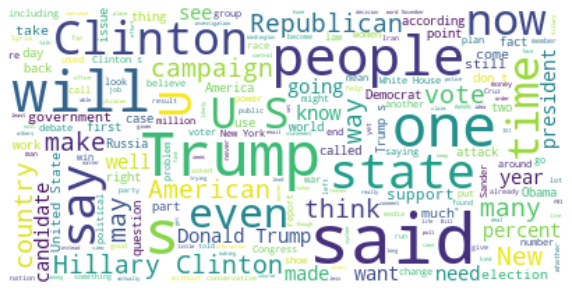

In [23]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = " ".join(i for i in news_df['text'])

wordcloud = WordCloud(max_font_size = 50, 
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [24]:
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LIKITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# Prepare data for the model. Convert label in to binary

news_df['label'] = [1 if x == 'FAKE' else 0 for x in news_df['label']]
news_df.head()

,Unnamed: 0,title,text,label,removed_punc,tokens,filtered_tokens,clean_tokens,lemma_words,clean_text
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,Daniel Greenfield a Shillman Journalism Fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel...",daniel greenfield shillman journalism fellow f...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,Google Pinterest Digg Linkedin Reddit Stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...",google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,US Secretary of State John F Kerry said Monday...,"[us, secretary, of, state, john, f, kerry, sai...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...","[secretary, state, john, kerry, said, monday, ...",secretary state john kerry said monday stop pa...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,— Kaydee King KaydeeKing November 9 2016 The l...,"[—, kaydee, king, kaydeeking, november, 9, 201...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...","[kaydee, king, kaydeeking, november, 2016, les...",kaydee king kaydeeking november 2016 lesson to...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,Its primary day in New York and frontrunners H...,"[its, primary, day, in, new, york, and, frontr...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...","[primary, york, frontrunners, hillary, clinton...",primary york frontrunners hillary clinton dona...


In [26]:
news_df.label.value_counts()

0    3171
1    3164
Name: label, dtype: int64

C:\Users\LIKITHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

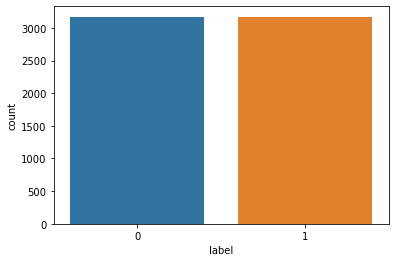

In [27]:
#visualizing the count of Real and Fake values
sns.countplot(news_df['label'])

In [28]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [29]:
# Split the dataset

X_train,X_test,y_train,y_test = train_test_split(news_df['clean_text'], news_df['label'], test_size=0.2, random_state = 5)

print(X_train.shape)
print(X_test.shape)

(5068,)
(1267,)


In [30]:
'''MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    naive_bayes.MultinomialNB
    ]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(tfidf_train, y_train).predict(tfidf_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
# Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()
# Creating plot to show the test accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of different machine learning models')
plt.show()'''

'MLA = [\n    #GLM\n    linear_model.LogisticRegressionCV(),\n    linear_model.PassiveAggressiveClassifier(),\n    #Navies Bayes\n    naive_bayes.BernoulliNB(),\n    naive_bayes.GaussianNB(),\n    naive_bayes.MultinomialNB\n    ]\n\nMLA_columns = []\nMLA_compare = pd.DataFrame(columns = MLA_columns)\n\nrow_index = 0\nfor alg in MLA:  \n    \n    predicted = alg.fit(tfidf_train, y_train).predict(tfidf_test)\n    fp, tp, th = roc_curve(y_test, predicted)\n    MLA_name = alg.__class__.__name__\n    MLA_compare.loc[row_index,\'MLA used\'] = MLA_name\n    MLA_compare.loc[row_index, \'Train Accuracy\'] = round(alg.score(X_train, y_train), 4)\n    MLA_compare.loc[row_index, \'Test Accuracy\'] = round(alg.score(X_test, y_test), 4)\n    MLA_compare.loc[row_index, \'AUC\'] = auc(fp, tp)\n\n    row_index+=1\n    \nMLA_compare.sort_values(by = [\'MLA Test Accuracy\'], ascending = False, inplace = True)    \n# Creating plot to show the train accuracy\nplt.subplots(figsize=(13,5))\nsns.barplot(x="ML

In [31]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2) , max_df = 0.5, min_df=2, lowercase= True)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
print(tfidf_train, tfidf_test)


  (0, 200959)	0.02208221923430295
  (0, 169132)	0.018929291346922148
  (0, 88723)	0.02208221923430295
  (0, 226311)	0.01920520630683884
  (0, 179343)	0.02208221923430295
  (0, 130758)	0.01564859324024157
  (0, 206218)	0.02208221923430295
  (0, 110867)	0.014714543589424062
  (0, 8530)	0.02208221923430295
  (0, 209128)	0.02208221923430295
  (0, 8623)	0.02208221923430295
  (0, 86788)	0.02208221923430295
  (0, 186727)	0.02208221923430295
  (0, 108376)	0.021328846047073403
  (0, 96469)	0.021328846047073403
  (0, 13843)	0.021328846047073403
  (0, 157150)	0.02208221923430295
  (0, 194782)	0.02208221923430295
  (0, 189190)	0.020744484404268973
  (0, 204855)	0.009845155164254753
  (0, 4430)	0.018048147940392827
  (0, 195371)	0.017248423631251692
  (0, 133682)	0.016748093904654135
  (0, 186962)	0.016232954883045998
  (0, 202955)	0.021328846047073403
  :	:
  (5067, 211450)	0.01586227953269562
  (5067, 130106)	0.009526071018703227
  (5067, 177909)	0.028652125424838817
  (5067, 4158)	0.006076749926

Accuracy score : 0.9439621152328335
Confusion matrix : 
 [[596  34]
 [ 37 600]]
Confusion matrix


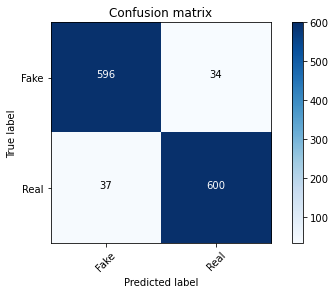

In [40]:
# Passive Aggresive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

pred = pac.predict(tfidf_test)
a1=accuracy_score(y_test,pred)*100
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Accuracy score:0.8453038674033149
Confusion matrix:
[[619  11]
 [185 452]]
Confusion matrix


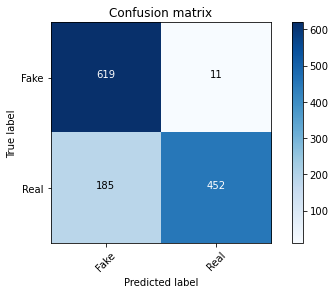

In [46]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn import metrics
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train, y_train)
pred = mnb_tf.predict(tfidf_test)
a2=accuracy_score(y_test,pred)*100
print("Accuracy score:{}".format(accuracy_score(y_test,pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,pred)))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


Accuracy score:0.9226519337016574
Confusion matrix:
[[577  53]
 [ 45 592]]
Confusion matrix
Confusion matrix


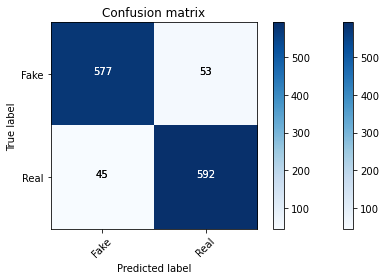

In [47]:
log_tf = LogisticRegression()
log_tf.fit(tfidf_train, y_train)
pred = log_tf.predict(tfidf_test)
a3=accuracy_score(y_test,pred)*100
print("Accuracy score:{}".format(accuracy_score(y_test,pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test,pred))) 

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])


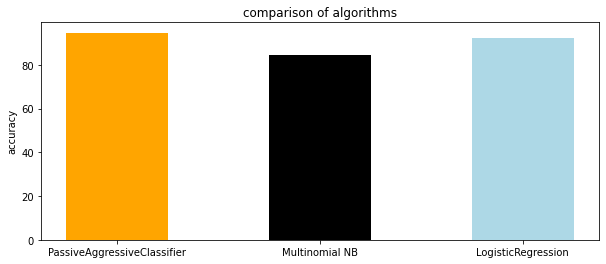

In [51]:
left=[0,30,60]
height=[a1,a2,a3]
tick_label=['PassiveAggressiveClassifier','Multinomial NB','LogisticRegression']
plt.figure(figsize=(10,4))
plt.bar(left,height,tick_label=tick_label,width=15,color=['orange','black','lightblue'])
plt.ylabel('accuracy')
plt.title('comparison of algorithms')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.linear_model import Ridge
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.naive_bayes import MultinomialNB

In [36]:
'''MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    naive_bayes.MultinomialNB
    ]

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:  
    
    predicted = alg.fit(tfidf_train, y_train).predict(tfidf_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA used'] = MLA_name
    MLA_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(tfidf_train, y_train), 4)
    MLA_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(tfidf_test, y_test), 4)
    MLA_compare.loc[row_index, 'AUC'] = auc(fp, tp)

    row_index+=1
    
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
# Creating plot to show the train accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()
# Creating plot to show the test accuracy
plt.subplots(figsize=(13,5))
sns.barplot(x="MLA used", y="Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Accuraccy of different machine learning models')
plt.show()'''

'MLA = [\n    #GLM\n    linear_model.LogisticRegressionCV(),\n    linear_model.PassiveAggressiveClassifier(),\n    #Navies Bayes\n    naive_bayes.BernoulliNB(),\n    naive_bayes.GaussianNB(),\n    naive_bayes.MultinomialNB\n    ]\n\nMLA_columns = []\nMLA_compare = pd.DataFrame(columns = MLA_columns)\n\nrow_index = 0\nfor alg in MLA:  \n    \n    predicted = alg.fit(tfidf_train, y_train).predict(tfidf_test)\n    fp, tp, th = roc_curve(y_test, predicted)\n    MLA_name = alg.__class__.__name__\n    MLA_compare.loc[row_index,\'MLA used\'] = MLA_name\n    MLA_compare.loc[row_index, \'Train Accuracy\'] = round(alg.score(tfidf_train, y_train), 4)\n    MLA_compare.loc[row_index, \'Test Accuracy\'] = round(alg.score(tfidf_test, y_test), 4)\n    MLA_compare.loc[row_index, \'AUC\'] = auc(fp, tp)\n\n    row_index+=1\n    \nMLA_compare.sort_values(by = [\'MLA Test Accuracy\'], ascending = False, inplace = True)    \n# Creating plot to show the train accuracy\nplt.subplots(figsize=(13,5))\nsns.barpl

In [37]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [38]:
import pickle
pac.fit(tfidf_train,y_train)
# Saving model to disk
pickle.dump(pac, open('model.pkl','wb'))
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
#print(model.predict([[2, 9, 6]]))